# 기본 세팅

## 폰트 설정

In [132]:
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['./fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
 print(mpl.font_manager.FontProperties(fname=font).get_name())
 mpl.font_manager.fontManager.addfont(font)

NanumGothicOTF Eco
Noto Sans KR
NanumBarunGothicOTF
NanumSquare_ac
NanumGothicOTF Eco
NanumSquare
NanumSquareRound
NanumBarunGothicOTF
NanumGothic
NanumSquare Neo ExtraBold
NanumBarunpenOTF
NanumMyeongjo
D2Coding
NanumSquare Neo Regular
NanumSquareOTF
NanumBarunGothicOTF YetHangul
NanumSquareOTF
NanumBarunGothic
NanumSquareOTF_ac
NanumMyeongjo YetHangul
Noto Sans KR
NanumSquare Neo OTF Bold
NanumBarunGothic
NanumBarunpen
NanumMyeongjoOTF Eco
NanumSquare_ac
NanumGothic Eco
NanumSquare Neo OTF ExtraBold
Noto Sans KR
NanumMyeongjo Eco
NanumGothicOTF Eco
NanumGothic Eco
NanumSquare Neo Bold
NanumSquare Neo Light
Nanum Pen Script
NanumSquareRoundOTF
NanumSquare
NanumGothicOTF
NanumGothicOTF
NanumSquareRound
NanumSquareOTF_ac
NanumSquare Neo Heavy
NanumSquare_ac
NanumGothic Eco
NanumSquare_ac
NanumGothic
NanumSquareOTF_ac
D2Coding ligature
NanumSquareRoundOTF
NanumMyeongjoOTF Eco
NanumSquareOTF_ac
Noto Sans KR
NanumSquareOTF
D2Coding ligature
NanumMyeongjo
Nanum Pen Script OTF
NanumMyeongjoO

In [133]:
# 시스템 폰트 경로 리스트
font_list = mpl.font_manager.findSystemFonts()
print(font_list)
# 폰트 설정하기
prop = mpl.font_manager.FontProperties(fname='원하는 폰트 경로')
plt.rcParams['font.family'] = prop.get_family()

['C:\\Windows\\Fonts\\Candaraz.ttf', 'C:\\Windows\\Fonts\\H2GPRM.TTF', 'C:\\Windows\\Fonts\\DUBAI-REGULAR.TTF', 'C:\\Windows\\Fonts\\verdanab.ttf', 'C:\\Windows\\Fonts\\l_10646.ttf', 'C:\\Windows\\Fonts\\calibrii.ttf', 'C:\\Windows\\Fonts\\comici.ttf', 'C:\\Windows\\Fonts\\SitkaB.ttc', 'C:\\Windows\\Fonts\\REFSAN.TTF', 'C:\\Windows\\Fonts\\gadugib.ttf', 'C:\\Windows\\Fonts\\ebrimabd.ttf', 'C:\\Windows\\Fonts\\mmrtext.ttf', 'C:\\Windows\\Fonts\\Candara.ttf', 'C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf', 'C:\\Windows\\Fonts\\HMFMOLD.TTF', 'C:\\Windows\\Fonts\\cambriab.ttf', 'C:\\Windows\\Fonts\\corbelb.ttf', 'C:\\Windows\\Fonts\\MTEXTRA.TTF', 'C:\\Windows\\Fonts\\gulim.ttc', 'C:\\Windows\\Fonts\\HMFMPYUN.TTF', 'C:\\Windows\\Fonts\\palab.ttf', 'C:\\Windows\\Fonts\\constanz.ttf', 'C:\\Windows\\Fonts\\mvboli.ttf', 'C:\\Windows\\Fonts\\calibrib.ttf', 'C:\\Windows\\Fonts\\ARIALNB.TTF', 'C:\\Windows\\Fonts\\seguibli.ttf', 'C:\\Windows\\Fonts\\bahnschrift.ttf', 'C:\\Windows\\Fonts\\seguihis.

In [134]:
# Set font family globally
mpl.rcParams['font.family'] = 'Noto Sans KR'
print(mpl.rcParams['font.family'])

['Noto Sans KR']


In [131]:
%cd C:\\Users\\User\\Desktop\\boot camp

C:\Users\User\Desktop\boot camp


## 데이터 로드

In [5]:
import easydict
args = easydict.EasyDict() #dict values 에 .으로 접근 가능하다 

# path 정보
args.default_path = 'C:\\Users\\User\\Desktop\\' # 파일 위치 
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'
args.default_submission_csv = args.default_path+'submission.csv'

args.submission_csv = args.default_path+'submission_0331.csv' # 새로운 파일 
args.save_results = args.default_path+"model_results.csv" # 정보저장 파일 

# 데이터 분석을 위한 변수들
args.random_state = 42
args.results = []

In [6]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')

In [7]:
ori_result = pd.read_csv(args.save_results)
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)
ori_train.shape, ori_test.shape

((916, 12), (393, 11))

In [8]:
ori_result

,Unnamed: 0,model,score_tr,score_te,auc_te,len_features,feaute_importances,create_dt
0,2,modelV2,0.982839,0.821818,0.894709,10,"['gender_female', 'gender_male', 'fare', 'age'...",330
1,1,modelV1,0.982839,0.825455,0.893922,10,"['gender_female', 'gender_male', 'fare', 'age'...",330
2,0,modelV0,0.982839,0.814545,0.892628,10,"['gender_male', 'fare', 'age', 'gender_female'...",330


# 데이터 확인 

In [10]:
ori_train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [11]:
ori_train.head(2)

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.875,NaN,S
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.750,NaN,Q


In [12]:
ori_test.columns # survived 가 빠짐 

Index(['passengerid', 'pclass', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [13]:
ori_test.head(2)

,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
1,917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S


In [14]:
ori_train.drop('passengerid', axis=1, inplace=True)
ori_test.drop('passengerid', axis=1, inplace=True)
ori_train.shape , ori_test.shape

((916, 11), (393, 10))

In [15]:
# 결측치가 많아서 삭제
ori_train.drop('cabin', axis=1, inplace=True)
ori_test.drop('cabin', axis=1, inplace=True)
ori_train.shape, ori_test.shape

((916, 10), (393, 9))

# train_test_split


In [16]:
ori_tr = ori_train.copy()
ori_te = ori_test.copy()

ori_tr.shape, ori_te.shape

((916, 10), (393, 9))

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train, test = train_test_split(ori_train, test_size=0.3, stratify=ori_train['survived'], random_state=args.random_state)

train.shape, test.shape

((641, 10), (275, 10))

In [19]:
corr_all = train.corr()

findfont: Font family ['Noto Sans KR'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

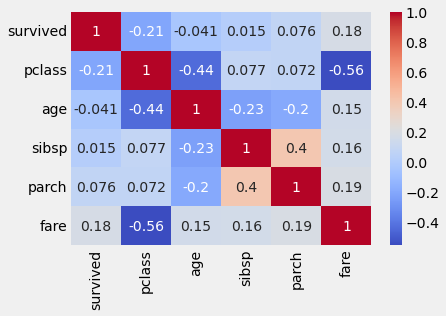

In [20]:
sns.heatmap(corr_all, annot=True, cmap='coolwarm')

# EDA(continuous features)

In [71]:
age_median = train['age'].median()
fare_median = train['fare'].median()
embarked_mode = train['embarked'].mode().values[0]

age_median, fare_median, embarked_mode

(28.0, 14.5, 'S')

In [72]:
train['age'].fillna(age_median, inplace=True)
test['age'].fillna(age_median, inplace=True)
ori_te['age'].fillna(age_median, inplace=True)

train['fare'].fillna(fare_median, inplace=True)
test['fare'].fillna(fare_median, inplace=True)
ori_te['fare'].fillna(fare_median, inplace=True)

train['embarked'].fillna(embarked_mode, inplace=True)
test['embarked'].fillna(embarked_mode, inplace=True)
ori_te['embarked'].fillna(embarked_mode, inplace=True)


## age 

In [73]:
train.corr()

,survived,pclass,age,sibsp,parch,fare,infant
survived,1.000000,-0.214195,-0.034229,0.015226,0.075825,0.176041,0.092450
pclass,-0.214195,1.000000,-0.408701,0.077389,0.071752,-0.555652,0.127257
age,-0.034229,-0.408701,1.000000,-0.199523,-0.178265,0.148851,-0.424700
sibsp,0.015226,0.077389,-0.199523,1.000000,0.399212,0.161138,0.257015
parch,0.075825,0.071752,-0.178265,0.399212,1.000000,0.189171,0.281306
fare,0.176041,-0.555652,0.148851,0.161138,0.189171,1.000000,-0.019858
infant,0.092450,0.127257,-0.424700,0.257015,0.281306,-0.019858,1.000000


In [74]:
continous_cols = ['age', 'fare'] + ['survived'] # 연속형이랑 타겟만 따로 만듬

train[continous_cols].describe()
# survived 가 0.337535이니까 산사람 맞추는게 어려움 -> 따라서 산사람 맞추는 feature를 만드는게 좋음 

,age,fare,survived
count,641.000000,641.000000,641.000000
mean,29.512356,31.941796,0.377535
std,13.147607,47.068732,0.485149
min,0.170000,0.000000,0.000000
25%,22.000000,7.925000,0.000000
50%,28.000000,14.500000,0.000000
75%,35.000000,30.000000,1.000000
max,80.000000,512.329200,1.000000


In [75]:
corr =train[['fare','pclass','age']].corr()

<AxesSubplot:>

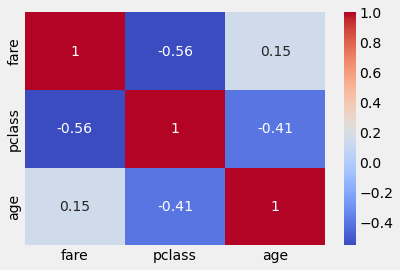

In [76]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

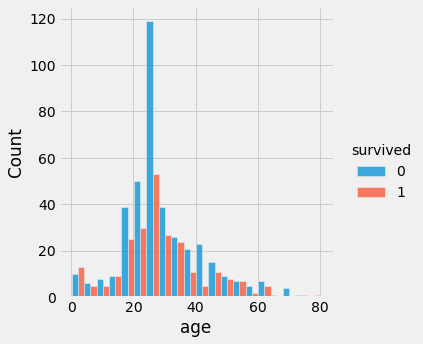

In [77]:
sns.displot(train, x='age', hue="survived", multiple="dodge", bins=20)
# 아이 세대만 죽은사람보다 산 사람이 많다

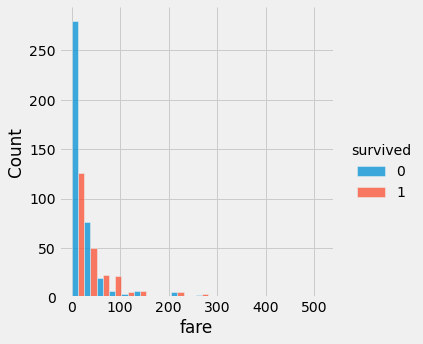

In [78]:
sns.displot(train, x='fare', hue="survived", multiple="dodge", bins=20)

In [79]:
c1 = train['age'] <= 5
train.loc[c1]['survived'].mean() # 5보다 적은 나이사람들 생존 0, 1로 표현의 평균

0.6

In [80]:
c1 = train['age'] <= 10
c2 = train['age'] > 5
c = c1 & c2
train.loc[c]['survived'].mean() # 5~10살 사이의 사람들 생존 평균

0.3125

In [81]:
c3 = train['age'] > 5
train.loc[c3]['survived'].mean() 
# 5살보다 많은 사람들의 평균이 5보다 적은 사람들의 평균보다 생존이 훨 적다 

0.3685064935064935

### age feature(5살보다 많은지 적은지)

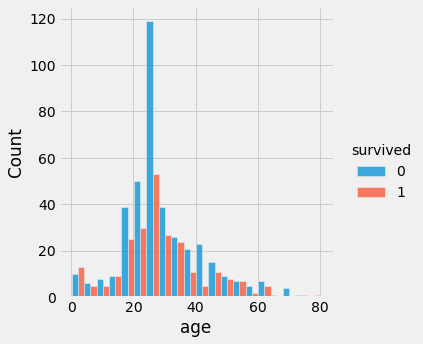

In [85]:
sns.displot(train, x="age", hue="survived", multiple="dodge",bins=20)

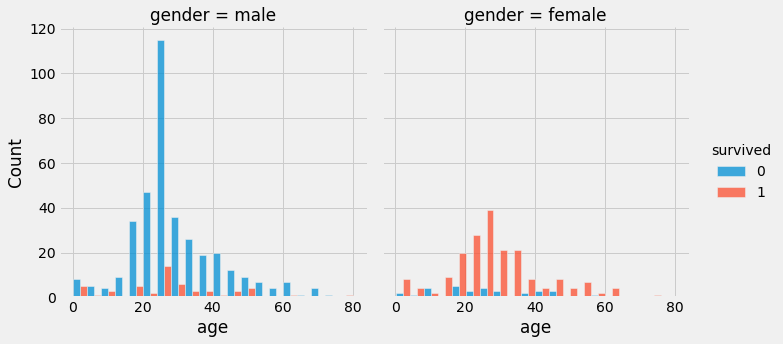

In [86]:
sns.displot(train, x="age", hue="survived", multiple="dodge", bins=20, col="gender")
# 여자가 많이 생존 했고 특히 60대 이상은 전부 생존했다(우연 ?)

In [98]:
train['age'] = train['age'].astype('int')

In [102]:
train['age']

539    28
339    36
505    22
492    26
897    28
       ..
538    24
761    15
879    10
214    24
636    70
Name: age, Length: 641, dtype: int32

In [105]:
def add_new_age(age):
    if age <= 5   :
      result = '유아'
    elif (age>5) & (age <=12):
      result = '어린이'
    elif (age>12) & (age <=18):
      result = '청소년'
    elif (age>18) & (age <=39):
      result = '성인'
    elif (age>39) & (age <=49):
      result = '중년'
    elif (age>49) & (age <=64):
      result = '장년'
    else :
      result = '노인'
    return result

train['new_age'] = train['age'].map(lambda x: add_new_age(x))
test['new_age'] = test['age'].map(lambda x: add_new_age(x))
ori_te['new_age'] = ori_te['age'].map(lambda x: add_new_age(x))


In [122]:
train['gender_new_age'] = train.apply(lambda row: row['gender']+'_'+row['new_age'], axis=1)
test['gender_new_age'] = test.apply(lambda row: row['gender']+'_'+row['new_age'], axis=1)
ori_te['gender_new_age'] = ori_te.apply(lambda row: row['gender']+'_'+row['new_age'], axis=1)

print(f"{train['gender_new_age'].nunique()} / \n {train['gender_new_age'].unique()} \n")

14 / 
 ['male_성인' 'female_성인' 'male_중년' 'female_중년' 'female_장년' 'male_청소년'
 'female_유아' 'male_어린이' 'female_청소년' 'female_어린이' 'male_장년' 'male_유아'
 'male_노인' 'female_노인'] 



In [123]:
train['pclass_new_age'] = train.apply(lambda row: str(row['pclass'])+'_'+row['new_age'], axis=1)
test['pclass_new_age'] = test.apply(lambda row: str(row['pclass'])+'_'+row['new_age'], axis=1)
ori_te['pclass_new_age'] = ori_te.apply(lambda row: str(row['pclass'])+'_'+row['new_age'], axis=1)

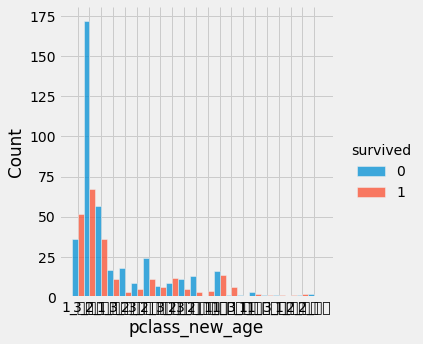

In [127]:
sns.displot(train, x="pclass_new_age", hue="survived", multiple="dodge", bins=20)

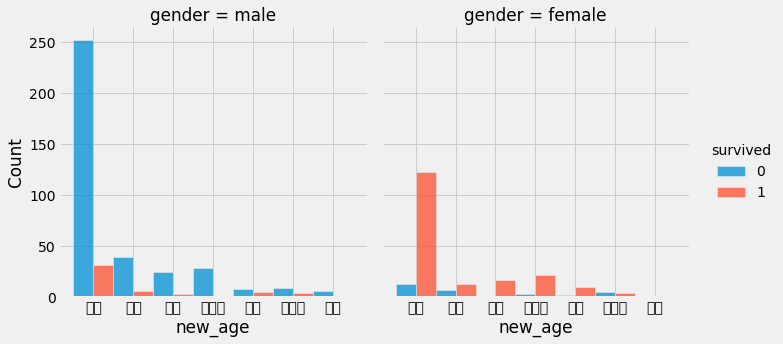

In [117]:
sns.displot(train, x="new_age", hue="survived", multiple="dodge", bins=20, col="gender")

In [87]:
def add_infant(age):
  result = 0
  try:
    if age <= 5:
      result = 1
  except:
    pass
  return result

train['infant'] = train['age'].map(lambda x: add_infant(x))
test['infant'] = test['age'].map(lambda x: add_infant(x))
ori_te['infant'] = ori_te['age'].map(lambda x: add_infant(x))

print(f"{train['infant'].nunique()} / \n {train['infant'].unique()} \n")
train.shape, test.shape, ori_te.shape

2 / 
 [0 1] 



((641, 18), (275, 18), (393, 17))

In [27]:
train['gender_infant'] = train.apply(lambda row: row['gender']+'_'+str(row['infant']), axis=1)
test['gender_infant'] = test.apply(lambda row: row['gender']+'_'+str(row['infant']), axis=1)
ori_te['gender_infant'] = ori_te.apply(lambda row: row['gender']+'_'+str(row['infant']), axis=1)
# 성별과 5살 미만인지 유무에 따라 새로운 feature를 만듬 

print(f"{train['gender_infant'].nunique()} / \n {train['gender_infant'].unique()} \n")
train.shape, test.shape, ori_te.shape

4 / 
 ['male_0' 'female_0' 'female_1' 'male_1'] 



((641, 12), (275, 12), (393, 11))

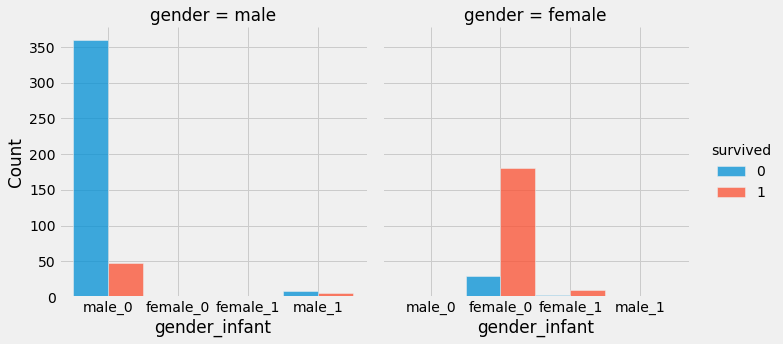

In [28]:
sns.displot(train, x="gender_infant", hue="survived", multiple="dodge")

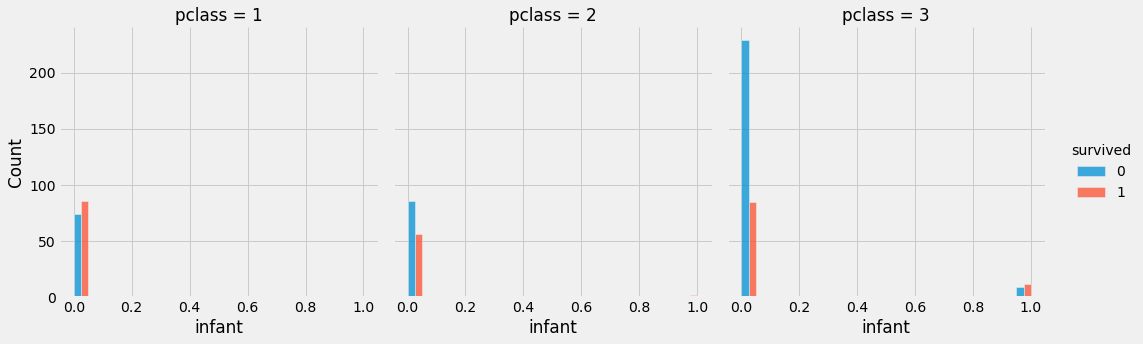

In [29]:
sns.displot(train, x="infant", hue="survived", multiple="dodge", bins=20, col="pclass")

In [37]:
def add_pclass_1(pclass):
  result = 'high pclass(1)'
  try:
    if pclass == 3 or pclass == 2 :
      result = 'low pcalss(2,3)'
  except:
    pass
  return result

In [39]:
train['pclass_3'] = train['pclass'].map(lambda x: add_pclass_3(x))
test['pclass_3'] = test['pclass'].map(lambda x: add_pclass_3(x))
ori_te['pclass_3'] = ori_te['pclass'].map(lambda x: add_pclass_3(x))

In [40]:
train['pclass1_gender'] = train.apply(lambda row: row['gender']+'_'+row['pclass_1'], axis=1)
test['pclass1_gender'] = test.apply(lambda row: row['gender']+'_'+row['pclass_1'], axis=1)
ori_te['pclass1_gender'] = ori_te.apply(lambda row: row['gender']+'_'+row['pclass_1'], axis=1)

In [38]:
def add_pclass_3(pclass):
  result = 'high pcalss(3)'
  try:
    if pclass == 1 or pclass == 2 :
      result = 'low pcalss(1,2)'
  except:
    pass
  return result

In [34]:
train['pclass_1'] = train['pclass'].map(lambda x: add_pclass_1(x))
test['pclass_1'] = test['pclass'].map(lambda x: add_pclass_1(x))
ori_te['pclass_1'] = ori_te['pclass'].map(lambda x: add_pclass_1(x))

In [42]:
train['pclass3_infant'] = train.apply(lambda row: str(row['infant'])+'_'+row['pclass_3'], axis=1)
test['pclass3_infant'] = test.apply(lambda row: str(row['infant'])+'_'+row['pclass_3'], axis=1)
ori_te['pclass3_infant'] = ori_te.apply(lambda row: str(row['infant'])+'_'+row['pclass_3'], axis=1)

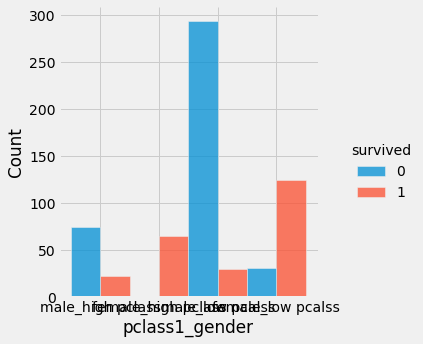

In [43]:
sns.displot(train, x="pclass1_gender", hue="survived", multiple="dodge")

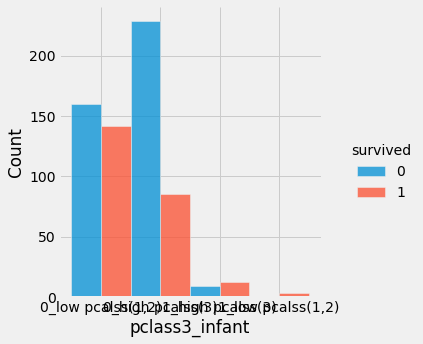

In [44]:
sns.displot(train, x="pclass3_infant", hue="survived", multiple="dodge")

In [ ]:
sns.displot(train, x="infant", hue="survived", multiple="dodge", bins=20, col='pclass',row='gender')
            # sns.displot(train, x="age", hue="survived", multiple="dodge", bins=20, col="pclass", row='gender')

In [ ]:
sns.displot(train, x="infant", hue="survived", multiple="dodge", bins=20, col="sibsp")
# 자매,부모가 많은(2명이상인) 남자들은 생존자 x 

In [ ]:
def add_sibsp(sibsp):
  result = 'small sib'
  try:
    if sibsp >=2 :
      result = 'large sib'
  except:
    pass
  return result

train['sibsp_2_high'] = train['sibsp'].map(lambda x: add_sibsp(x))
test['sibsp_2_high'] = test['sibsp'].map(lambda x: add_sibsp(x))
ori_te['sibsp_2_high'] = ori_te['sibsp'].map(lambda x: add_sibsp(x))

In [ ]:
train['sibsp_2_high_infant'] = train.apply(lambda row: row['sibsp_2_high']+'_'+str(row['infant']), axis=1)
test['sibsp_2_high_infant'] = test.apply(lambda row: row['sibsp_2_high']+'_'+str(row['infant']), axis=1)
ori_te['sibsp_2_high_infant'] = ori_te.apply(lambda row: row['sibsp_2_high']+'_'+str(row['infant']), axis=1)

In [ ]:
age_median = train['age'].median()
fare_median = train['fare'].median()
embarked_mode = train['embarked'].mode().values[0]

train['age'].fillna(age_median, inplace=True)
test['age'].fillna(age_median, inplace=True)
ori_te['age'].fillna(age_median, inplace=True)

train['fare'].fillna(fare_median, inplace=True)
test['fare'].fillna(fare_median, inplace=True)
ori_te['fare'].fillna(fare_median, inplace=True)

train['embarked'].fillna(embarked_mode, inplace=True)
test['embarked'].fillna(embarked_mode, inplace=True)
ori_te['embarked'].fillna(embarked_mode, inplace=True)

train.isnull().sum().sum(), test.isnull().sum().sum(), ori_te.isnull().sum().sum()

### data encoding

In [ ]:
enc_cols = ['gender', 'embarked']
normal_cols = list(set(train.columns) - set(enc_cols))
normal_cols

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

tmp_tr = pd.DataFrame(
    enc.fit_transform(train[enc_cols]).toarray(), #범주형 encoder 적용시켜서 temp_tr에 저장
    columns = enc.get_feature_names_out() # feature name을 뽑아냄 
)  
enc_tr = pd.concat(
    [train[normal_cols].reset_index(drop=True), tmp_tr.reset_index(drop=True)]
    , axis=1
) 
# 수치형 데이터(train[normal_cols]) + encoding 된 문자형 데이터(tmp_tr) 를 합쳐서 enc_tr



# test (ori_te 에서 나온 te  -> 모델의 학습을 평가(잘했는지 못했는지))
tmp_te = pd.DataFrame(
    enc.transform(test[enc_cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_te = pd.concat(
    [test[normal_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)


# ori_test
tmp_te = pd.DataFrame(
    enc.transform(ori_te[enc_cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_ori_te = pd.concat(
    [ori_te[normal_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)
print(f'before: {train.shape} / {test.shape} / {ori_te.shape}')
print(f'after: {enc_tr.shape} / {enc_te.shape} / {enc_ori_te.shape}')
# gender가 두개로 , embarked가 3개로 

### scaler

In [ ]:
scaling_cols = ['age', 'fare']
not_scaling_cols = list(set(enc_tr.columns) - set(scaling_cols))

from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()
_scaled_tr = rbs.fit_transform(enc_tr[scaling_cols])
_scaled_te = rbs.transform(enc_te[scaling_cols])
_scaled_ori_te = rbs.transform(enc_ori_te[scaling_cols])

print(f'before: {enc_tr.shape} / {enc_te.shape}')
# train
tmp_tr = pd.DataFrame(
    _scaled_tr, 
    columns = scaling_cols
)
scaled_tr = pd.concat(
    [enc_tr[not_scaling_cols].reset_index(drop=True), tmp_tr.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)
# test
tmp_te = pd.DataFrame(
    _scaled_te, 
    columns = scaling_cols
)
scaled_te = pd.concat(
    [enc_te[not_scaling_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)
# ori_test
tmp_te = pd.DataFrame(
    _scaled_ori_te, 
    columns = scaling_cols
)
scaled_ori_te = pd.concat(
    [enc_ori_te[not_scaling_cols].reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
).reset_index(drop=True)

print(f'after: {scaled_tr.shape} / {scaled_te.shape}')

In [ ]:
scaled_tr.shape, scaled_te.shape, scaled_ori_te.shape

In [ ]:
scaled_tr.head(2)

### Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelV2 = RandomForestClassifier(random_state=21)

modelV2.fit(scaled_tr, y_tr)

### Evaluation

In [ ]:
score_tr = modelV2.score(scaled_tr, y_tr)
score_te = modelV2.score(scaled_te, y_te) 

score_tr, score_te  

In [ ]:
from sklearn.metrics import roc_curve, auc 

y_pred = modelV2.predict_proba(scaled_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

In [ ]:
ori_te_pred = modelV2.predict_proba(scaled_ori_te)[:,1]

In [ ]:
df_feature_importances = pd.DataFrame(modelV2.feature_importances_, scaled_tr.columns).sort_values(by=[0], ascending=False).reset_index()
print(f'{df_feature_importances.shape}')

In [ ]:
args.results.append(
    {
        'model': 'modelV2',
        'score_tr': score_tr,
        'score_te': score_te,
        'auc_te': auc_te,
        'ori_te_pred': ori_te_pred,
        'len_features': X_tr.shape[1],
        'feaute_importances': list(df_feature_importances['index'].values[:X_tr.shape[1]]),
        'create_dt': '0330'
    }
)

# Submission

In [ ]:
# df_results = pd.DataFrame(args.results).sort_values(by=['auc_te'], ascending=False)
# df_results

In [ ]:
# submission = pd.read_csv(args.default_submission_csv)
# submission.head(2)

In [ ]:
# submission['survived'] = df_results.loc[0, ['ori_te_pred']].values[0] # 인덱스 2번에 헤당하는 ori_te_pred 뽑고 values는 array를 하나 풀어주기 위한 용도
# print(f'{submission.isnull().sum().sum()}')
# submission.head()

In [ ]:
# submission.to_csv(args.submission_csv, header=True, index=False) # 앞에서 지정한 submission_0330.csv로 저장된다

## 기존 결과 저장

In [ ]:
# args.save_results

In [ ]:
# df_results.columns

In [ ]:
# df_results.drop(['ori_te_pred'], axis=1, inplace=True) 

In [ ]:
# df_results.head()